In [54]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load MNIST:

In [55]:
mnist = fetch_openml('mnist_784', version=1)

KeyboardInterrupt: 

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist["data"].shape

(70000, 784)

In [ ]:
mnist["data"].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist["target"].head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
mnist["target"].shape

(70000,)

In [ ]:
X = mnist["data"].to_numpy().astype(np.float32)
y = mnist["target"].to_numpy().astype(int)
# Normalize data to the range [0, 1]
X /= 255.0



In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## One-Hot Encoding:
If we have y with such a labels: $y = [0, 1, 2, 1, 0]$
and 0, 1, 2 represent the classes, for example 0 is class A(like shoes), 2 is Class B like shirts and 3 is class C like socks.

now problem is, if we give this data directly to the machine learning algorithm, the model may thick 2 has an mathematical value but 2 is just an class label so we should represent this classes or categories in a another way.

instead of using a single number we will assign a vector from 0s and 1s to each class:
$$class A or 0 will be: [1, 0, 0]$$
$$class B or 1 will be: [0, 1, 0]$$
$$class C or 2 will be: [0, 0, 1]$$
as a result each label is now independently defined with out any ordering such bigger or smaller.

Our Original y after one-hot encoding:
```python

[
 [1, 0, 0],  # class 0
 [0, 1, 0],  # class 1
 [0, 0, 1],  # class 2
 [0, 1, 0],  # class 1
 [1, 0, 0]   # class 0
]
```


In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y       = encoder.fit_transform(y.reshape(-1,1)) 


In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Split data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000, 10)


(56000, 784)  # X_train: 56,000 samples, 784 features
(56000, 10)   # y_train: 56,000 samples, 10 classes (one-hot encoded)

# Implementing a normal NN Softmax with MSE(Wrong type for this problem) :

### Softmax reminder:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} \quad \text{for } i = 1, 2, \dots, n
$$



Softmax is **invariant to adding or subtracting the same number from all elements**:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}} 
= \frac{e^{z_i - c}}{\sum_j e^{z_j - c}}
$$

* Choosing $c = \max(z)$ is just a **numerical trick**.
* The output probabilities stay exactly the same. 



### Backward Pass Equations Review:

Let:

* $X \in \mathbb{R}^{m \times n}$ be the input matrix
* $y \in \mathbb{R}^{m \times k}$ be the true labels
* $a_1, a_2$ be the activations of hidden and output layers
* $z_1$ be the pre-activation of the hidden layer
* $w_1, w_2, b_1, b_2$ be the weights and biases
* $m$ = number of examples

---

1. **Output layer error**:

$$
dz_2 = a_2 - y
$$

2. **Gradients for output layer**:

$$
dw_2 = \frac{1}{m} \, a_1^\top \, dz_2
$$

$$
db_2 = \frac{1}{m} \sum_{i=1}^{m} dz_2^{(i)}
$$

3. **Hidden layer error** (tanh activation):

$$
dz_1 = (dz_2 \, w_2^\top) \odot \big(1 - \tanh^2(z_1)\big)
$$

4. **Gradients for hidden layer**:

$$
dw_1 = \frac{1}{m} \, X^\top \, dz_1
$$

$$
db_1 = \frac{1}{m} \sum_{i=1}^{m} dz_1^{(i)}
$$



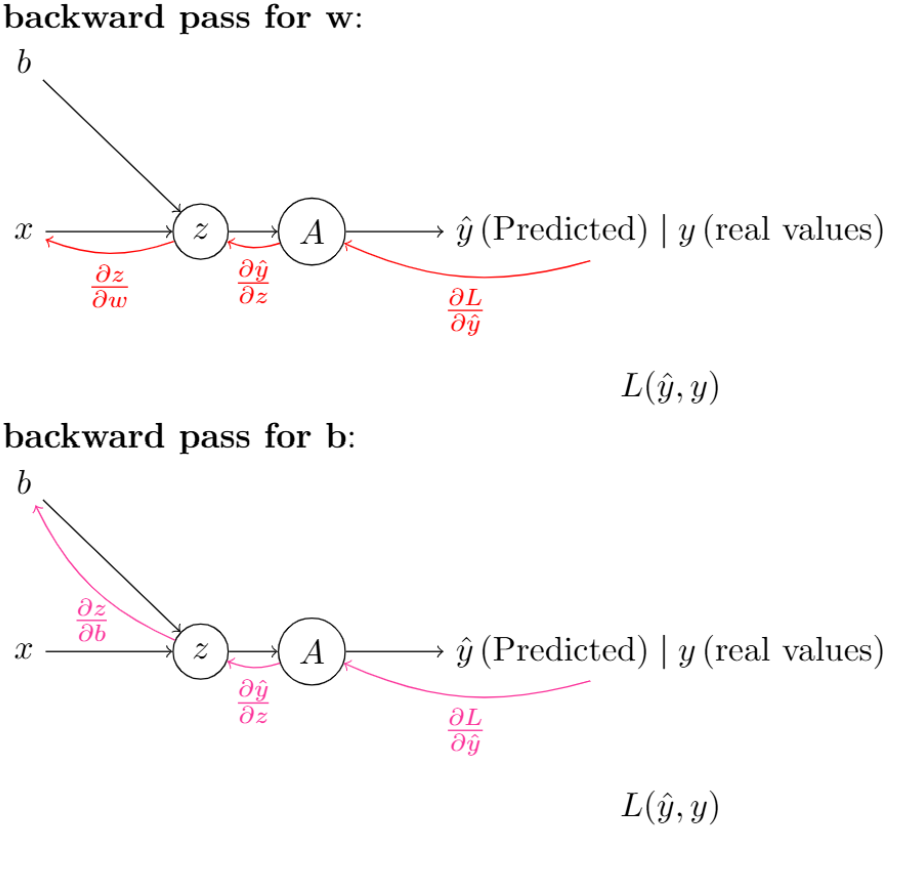




### Step1: $\frac{\partial L}{\partial a}$
as it is clear in the picture the first step is $\frac{\partial L}{\partial \hat{y}}$ and here $\hat{y}$ is $a_2$ so it will be written as: $\frac{\partial L}{\partial a_2}$ and if L is a MSE then the drivitive will be as follow:
$$
L = \frac{1}{2} \sum (a_2 - y)^2
$$

$$
\frac{\partial L}{\partial a_2} = a_2 - y
$$


```python
dz2 = self.a2 - y
```

### Step2: $\frac{{\partial a_2}}{\partial z_2}$
Ah! Let’s carefully define it. Since your network uses **softmax**,

$$
a_2 = \text{softmax}(z_2)
$$

and $z_2 \in \mathbb{R}^K$ (K = number of classes). Then the derivative $\frac{\partial a_2}{\partial z_2}$ is a **Jacobian matrix**:

$$
\frac{\partial a_2^{(i)}}{\partial z_2^{(j)}} =
\begin{cases} 
a_2^{(i)} (1 - a_2^{(i)}) & \text{if } i = j \\
- a_2^{(i)} a_2^{(j)} & \text{if } i \neq j
\end{cases}
$$

---

* **Diagonal elements $i=j$**: derivative of the probability for class $i$ w\.r.t. its own input:

$$
\frac{\partial a_2^{(i)}}{\partial z_2^{(i)}} = a_2^{(i)} (1 - a_2^{(i)})
$$

* **Off-diagonal elements $i \neq j$**: derivative of the probability for class $i$ w\.r.t. input of class $j$:

$$
\frac{\partial a_2^{(i)}}{\partial z_2^{(j)}} = - a_2^{(i)} a_2^{(j)}
$$

---

### Compact form (Jacobian matrix)

$$
J_{\text{softmax}} = \text{diag}(a_2) - a_2 a_2^T
$$

* $\text{diag}(a_2)$ is a diagonal matrix with the softmax outputs on the diagonal.
* $a_2 a_2^T$ is the outer product of the softmax vector with itself.

---




### Step3: $\frac{{\partial z_2}}{\partial w_2}$

$$
z_2 = a_1 W_2 + b_2
$$

Take derivative $W_2$:

$$
\frac{\partial z_2}{\partial W_2} = a_1
$$

### summary:
Then using the chain rule(Step 1 to 3):

$$
\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_2}
$$



1. Loss → activation:

$$
\frac{\partial L}{\partial a_2} = a_2 - y \qquad(\text{shape } m\times K)
$$

2. Activation → pre-activation (softmax Jacobian): for **each sample** $i$,

$$
\frac{\partial a_2^{(i)}}{\partial z_2^{(i)}} = J_{\text{softmax}}(a_2^{(i)}) = \operatorname{diag}(a_2^{(i)}) - a_2^{(i)}(a_2^{(i)})^\top
$$

This is a $K\times K$ matrix per sample. So for a batch we apply this Jacobian to each sample's $(a_2-y)$.

Thus for each sample $i$:

$$
\frac{\partial L}{\partial z_2^{(i)}} = J_{\text{softmax}}(a_2^{(i)})\;\bigl(a_2^{(i)}-y^{(i)}\bigr).
$$

Collecting for the batch we denote this by $dz_2\in\mathbb{R}^{m\times K}$.

3. Pre-activation → weights:

$$
z_2^{(i)} = a_1^{(i)} W_2 + b_2 \quad\Rightarrow\quad
\frac{\partial z_2^{(i)}}{\partial W_2} = a_1^{(i)}\ (\text{row vector})
$$

More usefully in matrix form the gradient accumulates as the product of $a_1^\top$ with $dz_2$.

---


Putting the three factors together (and averaging over the batch) gives:

$$
\boxed{\,\frac{\partial L}{\partial W_2}
= \frac{1}{m}\;a_1^\top \; dz_2
\;=\;\frac{1}{m}\;a_1^\top \;\bigl(J_{\text{softmax}}(a_2)\,(a_2 - y)\bigr)\,}
$$

where $J_{\text{softmax}}(a_2)\,(a_2-y)$ means: for each sample $i$ compute $J_{\text{softmax}}(a_2^{(i)})(a_2^{(i)}-y^{(i)})$, giving the $dz_2$ row for that sample; then form the $m\times K$ matrix $dz_2$.


In code, we usually don’t keep all three explicitly.
Instead, we **combine** the first two steps:

$$
\underbrace{\frac{\partial L}{\partial z_2}}_{\text{this is dz2 in your code}}
= \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2}.
$$


In  Code snippet:

```python
dz2[i] = J @ dL_da2[i]
```

* `J` = $\frac{\partial a_2}{\partial z_2}$
* `dL_da2[i]` = $\frac{\partial L}{\partial a_2}$ for sample $i$
* Result = $\frac{\partial L}{\partial z_2}$

So the variable name `dz2` really means:

$$
dz2 = \frac{\partial L}{\partial z_2}.
$$


For biases:

$$
\frac{\partial L}{\partial b_2} = \frac{1}{m}\sum_{i=1}^m dz_2^{(i)}.
$$

---

### Intuition / quick check

* $\frac{\partial z}{\partial W_2}=a_1$ is why $a_1^\top$ appears.
* If you used **cross-entropy** with softmax, the Jacobian multiplies away and $dz_2 = a_2-y$, so your current code `dz2 = a2 - y` would be exact.
* With **MSE + softmax** you **must** include the softmax Jacobian to be exact.

---



$$
\frac{\partial z_2}{\partial W_2} = a_1
$$

Chain rule:

For the hidden layer weights $W_1$:

$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1}
$$

* $a_1 = \tanh(z_1)$
* $z_1 = X W_1 + b_1$

Simplified:

* Define:

$$
dz_1 = \frac{\partial L}{\partial z_1} = \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1}
$$

* Then:

$$
\frac{\partial L}{\partial W_1} = dz_1 \cdot \frac{\partial z_1}{\partial W_1} = dz_1 \cdot X^T \quad (\text{or } X^T \cdot dz_1 \text{ in matrix form})
$$

Error signal for hidden layer:
dz1 = np.dot(dz2, self.w2.T) * (1 - self.a1**2)  # da1/dz1 = 1 - tanh^2(z1)

Gradients:
dw1 = np.dot(X.T, dz1) / m
db1 = np.sum(dz1, axis=0, keepdims=True) / m
```

* `dz1` = `dL/dz1` = “combined” derivative after chain rule
* `dw1` = `dL/dW1` = `dz1` times derivative of `z1` w\.r.t `W1`



Chain rule for hidden layer

For hidden weights $W_1$:

$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1}
$$

* $\frac{\partial a_1}{\partial z_1} = 1 - \tanh^2(z_1)$ ✅
* $\frac{\partial z_1}{\partial W_1} = X$ ✅


```python
dL_da1 = self.a1 - y        # ❌ This is only correct for output layer, not hidden layer
```

1. `dL_da1 = self.a1 - y` → **wrong** for hidden layer.

   * Hidden layer gradient comes from **next layer**:

   $$
   dL/da1 = dz2 \cdot W_2^T
   $$

   where `dz2 = dL/dz2` from output layer.
   You cannot directly use `self.a1 - y` — that’s only for output layer MSE.




In [ ]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        print(f"initialization: w1: {self.w1 } \n w2 {self.w2 } \n \
               b1: {self.b1 } \n b2: {self.b2 } \n ")
        
    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.softmax(self.z2)

        return self.a2

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def backward(self, X, y):
        batch_size = y.shape[0]
        """ for z2 and b2: """
        #Chain Rule
        #dL/dw2  = dL/da2 * da2/dz2 * dz2/dw2 
        #dL/dw2  = dL/dz2 * dz2/dw2  
    
        # --- Step 1: Loss derivative w.r.t. a2 ---
        dL_da2 = self.a2 - y   # (m x K), since loss = MSE
    
        # --- Step 2: Softmax derivative  ---
        # dL/dz2:

        # debugging print:
        # print(f"batchsize is: {batch_size}")
    
        dL_dz2_each = np.zeros_like(self.a2)  # renamed to keep per-sample gradients
        for i in range(batch_size):
            a         = self.a2[i].reshape(-1, 1)
            J         = np.diagflat(a) - np.dot(a, a.T)
            dL_dz2_each[i] = J @ dL_da2[i]
    
        # --- Step 3: z2 derivative w.r.t. W2 ---
        dz2_dw2 = self.a1   # (m x H), hidden activations
    
        # --- Step 4: Final gradient for W2(dL/dw2  = dL/dz2 * dz2/dw2  ) ---
        self.dw2  = np.dot(self.a1.T, dL_dz2_each) / batch_size
    
        # --- Gradient for b2 ---
        self.db2 = np.sum(dL_dz2_each, axis=0, keepdims=True) / batch_size
    
        """ for z1: """
        #Chain Rule
        #dL/dw1  = dL/da1 * da1/dz1 * dz1/dw1 
        #--------(dL/dz1 = dL/da1 * da1/dz1 ----> dL/dw1  = dL/dz1 * dz1/dw1
        #1−tanh2(z1​)
        dL_da1  = np.dot(dL_dz2_each, self.w2.T)  # renamed from self.dz2
    
        da1_dz1 = 1 - (np.tanh(self.z1)**2)
    
        # Step 3: chain rule: dL/dz1
        dz1 = dL_da1 * da1_dz1                   # element-wise multiplication
    
        # z1​=XW1​+b1​
        dz1_dw1 = X
    
        self.dw1  = np.dot(dz1_dw1.T, dz1) / batch_size
        self.db1  = np.sum(dz1, axis=0, keepdims=True) / batch_size
    
        # Save for reference (optional)
        self.dz1 = dz1
        self.dz2 = dL_dz2_each
    
    
    def get_parameters(self):
        return [self.w1, self.b1, self.w2, self.b2]

    def get_gradients(self):
        return [self.dw1, self.db1, self.dw2, self.db2]      

In [56]:
# Training function
def train(model, X_train, y_train, X_test, y_test, epochs, batch_size=64, learning_rate=0.01):
    history = {'train_loss': [], 'test_loss': [], 'test_accuracy': []}
    num_batches = X_train.shape[0] // batch_size

    for epoch in range(epochs):
        # Shuffle training data
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        epoch_loss = 0

        for i in range(num_batches):
            # Get batch data
            start = i * batch_size
            # end = start + batch_size
            end = min(start + batch_size, X_train_shuffled.shape[0])
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            # Forward pass
            output = model.forward(X_batch)

            #Cross-entropy loss:
            loss = np.mean(-np.sum(y_batch * np.log(output + 1e-8), axis=1))  
            
            #MSE loss:
            #loss = np.mean((y_batch - output) ** 2)  # MSE loss
            epoch_loss += loss

            # Backward pass
            model.backward(X_batch, y_batch)

            # Get gradients
            dw1, db1, dw2, db2 = model.get_gradients()

            # Update weights and biases
            model.w1 -= learning_rate * dw1
            model.b1 -= learning_rate * db1
            model.w2 -= learning_rate * dw2
            model.b2 -= learning_rate * db2

        # Average loss per epoch
        avg_epoch_loss = epoch_loss / num_batches
        history['train_loss'].append(avg_epoch_loss)

        # Evaluate on test set
        test_output = model.forward(X_test)
        test_loss = np.mean(-np.sum(y_test * np.log(test_output + 1e-8), axis=1))  # Cross-entropy loss
        #test_loss = np.mean((y_test - test_output) ** 2)  # MSE loss
        test_preds = np.argmax(test_output, axis=1)
        test_labels = np.argmax(y_test, axis=1)
        test_accuracy = np.mean(test_preds == test_labels)

        history['test_loss'].append(test_loss)
        history['test_accuracy'].append(test_accuracy)

        if epoch % 5 == 0:
            print(f'Epoch {epoch}: Train Loss: {avg_epoch_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return history

In [57]:
# Model parameters
input_size = 784  # 28x28 pixels
hidden_size = 128
output_size = 10
epochs = 30
batch_size = 64

# Training 
print("Training ...")
model = SimpleNN(input_size, hidden_size, output_size)

print("Training with Adam optimizer...")
history = train(model, X_train, y_train, X_test, y_test, epochs, batch_size)



Training ...
initialization: w1: [[ 0.00165342  0.01015937 -0.00594976 ... -0.00443128  0.00327373
   0.00636587]
 [-0.00127639  0.00518611 -0.00708785 ... -0.01552339  0.0025194
   0.01828394]
 [ 0.01122118  0.01860334  0.00135998 ... -0.01968146  0.01504449
   0.01569549]
 ...
 [ 0.00384988  0.00697495 -0.00321263 ... -0.00997139 -0.00378081
  -0.01194784]
 [-0.00460287  0.01166426 -0.00955444 ... -0.00052217 -0.01456709
   0.00888656]
 [ 0.01290986  0.01638242  0.0028878  ... -0.00167249 -0.00989614
  -0.00388283]] 
 w2 [[-0.00867777 -0.00068394  0.00141643 ... -0.00268099 -0.00642234
   0.00370525]
 [ 0.00810381  0.00935961 -0.01862774 ... -0.01132604  0.00950365
  -0.01368788]
 [-0.0005692   0.01528645  0.00684552 ...  0.0069495  -0.00322006
   0.01598973]
 ...
 [-0.01420248 -0.00428804  0.00722232 ...  0.01412581 -0.00091948
  -0.00864832]
 [-0.00405523  0.00932108  0.00083903 ...  0.00366213 -0.00271259
   0.00492246]
 [ 0.0055755   0.00190984 -0.01577409 ...  0.01824968 -0.0059

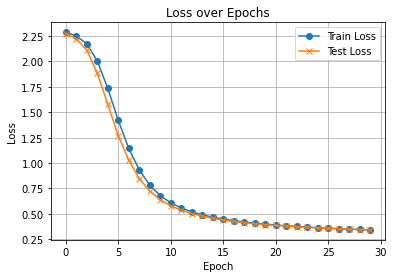

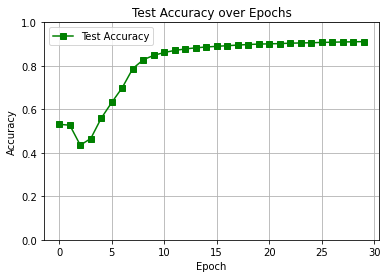

In [58]:

import matplotlib.pyplot as plt

# Plot Train & Test Loss
# plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss', marker='o')
plt.plot(history['test_loss'], label='Test Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Accuracy
# plt.figure(figsize=(10, 5))
plt.plot(history['test_accuracy'], label='Test Accuracy', marker='s', color='green')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy between 0 and 1
plt.legend()
plt.grid(True)
plt.show()


# Implementing a normal NN Softmax with CrossEntropy :

# Tiny Adam and SGD

In [59]:
class NormalNNStep:
    def __init__(self, parameters, lr=0.01):
        self.parameters = parameters
        self.lr         = lr
    def step(self, gradients):
        for param, grad in zip(self.parameters, gradients):
            param -= self.lr * grad
            


In [60]:
class Adam:
    def __init__(self, parameters, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.parameters = parameters
        self.lr         = lr
        self.beta1      = beta1
        self.beta2      = beta2
        self.epsilon    = epsilon
        #Initialize first and second moment estimates:
        self.m = [np.zeros_like(p) for p in self.parameters]
        self.v = [np.zeros_like(p) for p in self.parameters]
        self.t = 0
    
    def step(self, grad):
        self.t += 1
        for i, (param, grad) in enumerate(zip(self.parameters, grad)):
            #update biased first moment estimate:
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            #update biased second moment estimate:
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2)

            # Compute bias-corrected estimates
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)

            #update parameters:
            param -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        
        

In [61]:
# Training function
def train(model, optimizer, X_train, y_train, X_test, y_test, epochs, batch_size=64, learning_rate=0.01):
    history = {'train_loss': [], 'test_loss': [], 'test_accuracy': []}
    num_batches = X_train.shape[0] // batch_size

    for epoch in range(epochs):
        # Shuffle training data
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        epoch_loss = 0

        for i in range(num_batches):
            # Get batch data
            start = i * batch_size
            # end = start + batch_size
            end = min(start + batch_size, X_train_shuffled.shape[0])
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            # Forward pass
            output = model.forward(X_batch)

            # Cross-entropy loss:
            #loss = np.mean(-np.sum(y_batch * np.log(output + 1e-8), axis=1))  
            
            # MSE loss:
            loss = np.mean((y_batch - output) ** 2)  # MSE loss
            epoch_loss += loss

            # Backward pass
            model.backward(X_batch, y_batch)

            ## Get gradients
            grads = model.get_gradients()
            # Update weights and biases using NormalNNStep:
            optimizer.step(grads)
            

        # Average loss per epoch
        avg_epoch_loss = epoch_loss / num_batches
        history['train_loss'].append(avg_epoch_loss)

        # Evaluate on test set
        test_output = model.forward(X_test)
        test_loss = np.mean(-np.sum(y_test * np.log(test_output + 1e-8), axis=1))  # Cross-entropy loss
        #test_loss = np.mean((y_test - test_output) ** 2)  # MSE loss
        test_preds = np.argmax(test_output, axis=1)
        test_labels = np.argmax(y_test, axis=1)
        test_accuracy = np.mean(test_preds == test_labels)

        history['test_loss'].append(test_loss)
        history['test_accuracy'].append(test_accuracy)

        if epoch % 5 == 0:
            print(f'Epoch {epoch}: Train Loss: {avg_epoch_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return history

In [62]:
# Model parameters
input_size  = 784  # 28x28 pixels
hidden_size = 128
output_size = 10
epochs      = 30
batch_size  = 64


print("Training with Adam optimizer ...")
adam_model              = SimpleNN(input_size, hidden_size, output_size)
adams_model_parameters  = adam_model.get_parameters()
adam_optimizer          = Adam(adams_model_parameters, lr=0.01)
adam_model_history      = train(adam_model, adam_optimizer, X_train, y_train, X_test, y_test, epochs, batch_size)


# Training 
print("Training Normal NN Step...")
normal_model            = SimpleNN(input_size, hidden_size, output_size)
normal_model_parameters = normal_model.get_parameters()
optimizer               = NormalNNStep(normal_model_parameters, lr=0.01)
normal_model_history    = train(normal_model, optimizer, X_train, y_train, X_test, y_test, epochs, batch_size)




Training with Adam optimizer ...
initialization: w1: [[ 0.00721615  0.00494239 -0.00917583 ... -0.00727187  0.00215339
  -0.01614492]
 [ 0.01135409 -0.00797615  0.00155931 ...  0.00855664 -0.01887618
   0.00019161]
 [ 0.00208054 -0.00045144  0.00081611 ...  0.00115214  0.00378316
   0.00266044]
 ...
 [-0.00094578 -0.00588707 -0.004469   ...  0.00651677  0.0054261
  -0.00503205]
 [-0.0024823   0.0017539  -0.00189753 ... -0.00444658 -0.00740412
   0.00189528]
 [ 0.00040288  0.00135691 -0.00242224 ... -0.00496307 -0.00242465
   0.00692663]] 
 w2 [[-0.00871318  0.00177618 -0.00502864 ...  0.01141718 -0.01382279
  -0.00975648]
 [-0.0142981   0.00560745  0.00023644 ... -0.00807642 -0.0116965
  -0.01007074]
 [ 0.01005056 -0.00231723 -0.01037752 ... -0.00465127 -0.01738491
   0.00981187]
 ...
 [-0.01787266 -0.00093126 -0.00759451 ... -0.00520018 -0.01519783
   0.00378647]
 [-0.00856622 -0.00075767  0.00085192 ... -0.00288707  0.01110052
  -0.00804044]
 [-0.01978223 -0.00213752 -0.01007745 ... 

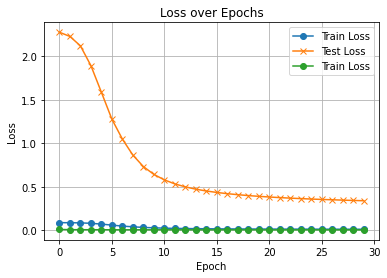

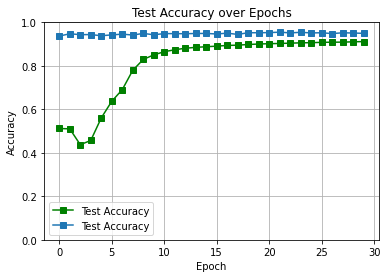

In [63]:

import matplotlib.pyplot as plt

# Plot Train & Test Loss
# plt.figure(figsize=(10, 5))
plt.plot(normal_model_history['train_loss'], label='Train Loss', marker='o')
plt.plot(normal_model_history['test_loss'], label='Test Loss', marker='x')
plt.plot(adam_model_history['train_loss'], label='Train Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Accuracy
# plt.figure(figsize=(10, 5))
plt.plot(normal_model_history['test_accuracy'], label='Test Accuracy', marker='s', color='green')
plt.plot(adam_model_history['test_accuracy'], label='Test Accuracy', marker='s')

plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy between 0 and 1
plt.legend()
plt.grid(True)
plt.show()
